In [53]:
import sys
sys.path.append('..')
from configure.settings import DBSelector
from common.DataFetch import DataFetcher
import pandas as pd
import re
import random
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
doc_name = 'bond_top_10_holding_2022-09-02'
client = DBSelector().mongo('qq')
doc = client['db_stock'][doc_name]

In [55]:
result =[]
for item in doc.find({}):
    del item['_id']
    result.append(item)

In [56]:
df = pd.DataFrame(result)

In [57]:
df.head()

,SECUCODE,SECURITY_CODE,BOND_NAME_ABBR,HOLDER_NAME,END_DATE,HOLD_NUM,HOLD_RATIO,HOLDER_RANK
0,113502.SH,113502,嘉澳转债,华夏基金延年益寿5号纯债固定收益型养老金产品-中国农业银行股份有限公司,2022-06-30 00:00:00,92410,5.02,1
1,113502.SH,113502,嘉澳转债,中融国际信托有限公司-中融-墨砺29号证券投资集合资金信托计划,2022-06-30 00:00:00,81300,4.41,2
2,113502.SH,113502,嘉澳转债,平安银行股份有限公司-长信可转债债券型证券投资基金,2022-06-30 00:00:00,80940,4.39,3
3,113502.SH,113502,嘉澳转债,华夏基金延年益寿7号固定收益型养老金产品-中信银行股份有限公司,2022-06-30 00:00:00,80530,4.37,4
4,113502.SH,113502,嘉澳转债,中国工商银行股份有限公司-银华可转债债券型证券投资基金,2022-06-30 00:00:00,75710,4.11,5


In [6]:
len(df)


22824

In [10]:
df_latest=df[df['name'].isnull()]

In [11]:
len(df_latest)

22824

In [ ]:
df_latest.head()

In [17]:
contains_df = df_latest[['SECUCODE','SECURITY_CODE','BOND_NAME_ABBR','HOLDER_NAME','END_DATE','HOLD_NUM','HOLD_RATIO','HOLDER_RANK']]

In [20]:
contains_df.to_csv('2022-09-02-top-ten-holding.csv',encoding='utf8')

In [58]:
df['END_DATE']=df['END_DATE'].map(lambda x:x.split(' ')[0])

In [6]:
df['SECURITY_CODE'].value_counts()

113013    187
113537    160
113011    134
113017    122
113016    121
         ... 
118014     11
123148     11
113061     11
123152     11
118015     11
Name: SECURITY_CODE, Length: 432, dtype: int64

In [31]:
len(df[df['END_DATE']>'2021-12-31'])

5458

In [59]:
latest_df = df[df['END_DATE']>='2022-06-30']

In [41]:
len(latest_df)

4831

In [11]:
latest_df['SECURITY_CODE'].value_counts()

113060    22
127065    22
127064    22
118009    22
123149    22
          ..
113600    11
113545    11
113649    11
110060    11
123013    11
Name: SECURITY_CODE, Length: 431, dtype: int64

In [60]:
index=latest_df[latest_df['HOLDER_NAME']=='合计'].index

In [61]:
latest_df1=latest_df.drop(index,axis=0)

In [54]:
len(latest_df)

4831

In [55]:
len(latest_df1)

4392

In [62]:
more=latest_df1['BOND_NAME_ABBR'].value_counts()

In [63]:
more_index = more[more==20].index

In [64]:
index = latest_df1[(latest_df1['END_DATE']=='2022-06-30')&(latest_df1['BOND_NAME_ABBR'].isin(more_index))].index

In [65]:
latest_df2=latest_df1.drop(index,axis=0)
df=latest_df2.copy()

In [43]:
len(latest_df2)

4312

In [44]:
latest_df2['BOND_NAME_ABBR'].value_counts()

美诺转债    12
嘉澳转债    10
万青转债    10
佳力转债    10
奥飞转债    10
        ..
新星转债    10
金能转债    10
丰山转债    10
天路转债    10
横河转债    10
Name: BOND_NAME_ABBR, Length: 431, dtype: int64

In [ ]:
latest_df2[latest_df2['BOND_NAME_ABBR']=='美诺转债']

In [113]:
df=latest_df2.copy()

In [ ]:
latest_df[latest_df['SECURITY_CODE']=='113060']

In [30]:
less_report = df[df['update_date']<'2021-12-31']

In [31]:
codes_list = []
for code ,sub_df in less_report.groupby('code'):
    codes_list.append({'code':code,'name':code_name_mapper.get(code),'update_date':sub_df.iloc[0]['update_date']})

In [32]:
not_release = pd.DataFrame(codes_list) # 为发年报

In [28]:
not_release.head()

,code,name,update_date
0,110038,济川转债,2021-06-30
1,110043,无锡转债,2021-06-30
2,110044,广电转债,2021-06-30
3,110045,海澜转债,2021-06-30
4,110047,山鹰转债,2021-06-30


In [34]:
not_release.to_excel('not_release_annual_year_report.xlsx',encoding='utf8')

In [35]:
len(not_release)

258

In [71]:
df.to_excel('topTen20220902.xlsx',encoding='utf8')

In [7]:
result_item = {}
for code,sub_df in df.groupby('code'):
#     print(code)
    for date,sub_x in sub_df.groupby('update_date'):
        result_item[code+'_'+date]=sub_x['name'].tolist()

In [ ]:
result_item

In [9]:
counter ={}
for k,v in result_item.items():
    for i in v:
        counter.setdefault(i,0)
        counter[i]+=1

In [10]:
holding_list = list(sorted(counter.items(),key=lambda x:x[1],reverse=True))

In [11]:
holding_list[:10]

[('UBS AG', 65),
 ('中国工商银行股份有限公司-汇添富可转换债券债券型证券投资基金', 57),
 ('富国富益进取固定收益型养老金产品-中国工商银行股份有限公司', 49),
 ('国信证券股份有限公司', 46),
 ('中国建设银行股份有限公司-易方达双债增强债券型证券投资基金', 45),
 ('中国农业银行股份有限公司-鹏华可转债债券型证券投资基金', 41),
 ('中国工商银行股份有限公司-天弘添利债券型证券投资基金(LOF)', 36),
 ('兴业银行股份有限公司-天弘永利债券型证券投资基金', 35),
 ('中国民生银行股份有限公司-安信稳健增值灵活配置混合型证券投资基金', 34),
 ('中国银行-易方达稳健收益债券型证券投资基金', 33)]

In [23]:
len(result_item)

375

In [ ]:
holding_list

In [ ]:
x=[i if i[1]>1 and len(i[0])<5 for i in holding_list]

In [ ]:
for i in holding_list:
    if len(i[0])<5:
        print(i)

In [ ]:
for i in holding_list:
    if len(i[0])>3:
        print(i)

In [ ]:
df[df['code']=='123015']

In [9]:
data_source = DataFetcher()

In [10]:
jsl_data = data_source.jsl_bond

In [11]:
len(jsl_data)

393

In [ ]:
jsl_data.head()

In [13]:
code_name_mapper ={}
for index,row in jsl_data.iterrows():
    code_name_mapper[row['可转债代码']]=row['可转债名称']    

In [17]:
df['zz_name']=df['code'].map(lambda x:code_name_mapper.get(x))

In [ ]:
df.head()

In [24]:
monster_bond = jsl_data[(jsl_data['可转债价格']>150) & (jsl_data['溢价率']>50)]['可转债代码'].tolist()

In [ ]:
# del df['crawltime']

for code in monster_bond:
    print('='*20)
    print(df[df['code']==code])

In [30]:
monster_bond_df = df[df['code'].isin(monster_bond)]

In [ ]:
monster_bond_df

In [32]:
def name_mapper_func(x):
    pass

In [36]:
count_df = monster_bond_df['name'].value_counts()

In [ ]:
for index in count_df.index:
    print(index,count_df[index])
    # print(index,count_df.index[index])

In [19]:

def map_short_name(x):
    if len(x)<5:
        return x
    for i in mapper_list:
        if re.search(i,x):
            return i
    return ''

In [12]:
len(set(df[df['name'].str.contains('林园')]['code'].tolist()))

24

In [ ]:
mapper_list =['林园','宁泉','甄投','明汯','汇添富','博时',
'易方达','全国社保','兴全','东方红','南方东英','嘉实','富国','天弘',
'光大保德','诺安','中欧','中邮','上海迎水','广发','鹏华','上海泉汐','上海睿郡']
df['short_name']=df['name'].map(map_short_name)
# print(df[['zz_name','short_name','name']])
display_institute((df))

In [13]:
def display_institute(df):
    for index,row in df.iterrows():
        if row['short_name']=='':
            print(row['name'])

In [46]:
def get_invest_company(x):
    return x.split('-')[0]

In [19]:
df['invest_company']=df['name'].map(get_invest_company)

In [22]:
institute_counter ={}
for index,row in df[df['name'].str.contains('私募')].iterrows():
    # print(row['name'],row['holding_ratio'],row['zz_name'],row['invest_company'])
    institute_counter.setdefault(get_invest_company(row['name']),0)
    institute_counter[get_invest_company(row['name'])]+=1


In [ ]:
for i in df['invest_company'].value_counts().index:
    print(i)

In [83]:
institution = list(sorted(institute_counter.items(),key=lambda x:x[1],reverse=True))

In [89]:
X1=[]
X2=[]
for x1,x2 in institution:
    X1.append(x1)
    X2.append(x2)
    # print(x1)
    # print(x1,x2)
institution_df  = pd.DataFrame({'name':X1,'count':X2})

In [24]:
df.to_excel('institution-2022-04-16.xlsx',encoding='utf8')

In [58]:
df1 = pd.DataFrame(result)

In [59]:
df1.to_excel('kzz_top_holding.xlsx',encoding='utf8')

In [64]:
len(df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']])

60

In [ ]:
df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

In [23]:
def convertor(x):
    if re.search('万',x):
        x=x.replace('万','')
        x=float(x)*10**4
    elif re.search('亿',x):
        x=x.replace('亿','')
        x=float(x)*10**9
    
    return float(x)

df['amount_float']=df['amount'].map(convertor)

In [ ]:
df[df['name'].str.contains('睿郡')][['zz_name','name','amount_float']].groupby('zz_name').sum('amount_float').sort_values('amount_float',ascending=False)

In [ ]:
df[df['name'].str.contains('宁泉')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

In [ ]:
relationsihp ={}
for index,row in df.iterrows():
    
    relationsihp.setdefault()

In [26]:
# 分类

In [19]:
def category(x):
    # category_list = ['私募','']
    if re.search('私募',x):
        return '私募'

    if len(x)<5:
        return '个人'

    if re.search('社保',x):
        return '社保'

    return '公募'

In [25]:
df['category']=df['name'].map(category)

In [26]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,invest_company,amount_float,category
0,113036,宁波交通投资控股有限公司,161.48万,2021-06-30,29.91,2022-04-01 23:49:07.444,宁建转债,宁波交通投资控股有限公司,1614800.0,公募
1,113036,UBS AG,46.40万,2021-06-30,8.59,2022-04-01 23:49:07.444,宁建转债,UBS AG,464000.0,公募
2,113036,中国建设银行-易方达增强回报债券型证券投资基金,23.04万,2021-06-30,4.27,2022-04-01 23:49:07.444,宁建转债,中国建设银行,230400.0,公募
3,113036,中国银行-易方达稳健收益债券型证券投资基金,21.27万,2021-06-30,3.94,2022-04-01 23:49:07.444,宁建转债,中国银行,212700.0,公募
4,113036,中国民生银行股份有限公司-安信稳健增值灵活配置混合型证券投资基金,20.10万,2021-06-30,3.72,2022-04-01 23:49:07.444,宁建转债,中国民生银行股份有限公司,201000.0,公募


In [27]:
df['category'].value_counts()

公募    2710
个人     782
私募     292
社保      87
Name: category, dtype: int64

In [34]:
result_dict = {}
for code,code_df in df.groupby('code'):
    result_dict[code]=code_df['invest_company'].tolist()

In [35]:
invest_name_code_dict = {}
for k,v in result_dict.items():
    for i in v:
        invest_name_code_dict.setdefault(i,[])
        invest_name_code_dict[i].append(k)

In [48]:

relationship_dict ={}
for k,v in invest_name_code_dict.items():
    relationship_dict.setdefault(k,{})
    # for i in v:
    for other_k,other_v in invest_name_code_dict.items():
        if k==other_k:
            continue
        relationship_dict[k].update({other_k:set(v)&set(other_v)})



In [49]:
relation_len = {}
for k,v in relationship_dict.items():
    max_value = 0
    max_value_name = ''

    for name,value in v.items():
        if len(value)>max_value:
            max_value =len(value)
            max_value_name = name

    relation_len[k]=(max_value_name,max_value)

In [ ]:
f=open('relation.txt','w',encoding='utf8')
for k,v in relation_len.items():
    if v[1]>2:
        print(k,v)
        f.write(f'{k}\t{v}\n')

In [44]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,category,invest_company
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债,私募,深圳市平石资产管理有限公司
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债,私募,上海宁泉资产管理有限公司
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债,公募,广州诚信创业投资有限公司
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债,个人,钟宝申
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债,个人,郑淑芬


In [28]:
df[df['name'].str.contains('希瓦')]

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,invest_company,amount_float,category


In [ ]:
# 绘制关系图

In [84]:
def show_figure(relationDict,namelist,title):
    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i/5)

    plt.figure(figsize=(16,9))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*100 for v in d.values()],
                     node_color=range(len(namelist)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('tet.png')
    plt.show()

In [38]:
mask=df['name'].str.len()<5
df_=df.loc[mask]
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

KeyError: 'name'

In [15]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [16]:
mask=df['name'].str.len()<5
df_individual = df.loc[mask]

In [ ]:
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_individual.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

In [96]:
def show_figure(relationDict,namelist_,title):
    # relationDict namelist_

    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i)

    plt.figure(figsize=(8,5))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*500 for v in d.values()],
                     node_color=range(len(namelist_)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('test1.png')
    plt.show()

In [74]:
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in person_df.groupby('SECURITY_CODE'):
    names = row['HOLDER_NAME'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
# print(relation_dict)

In [25]:
len(namelist)

717

In [24]:
len(relation_dict)

1632

In [99]:
remain_dict ={}
for k,v in relation_dict.items():
    if v>=2:
        remain_dict[k]=v

In [101]:
remain_dict

{('丁碧霞', '李怡名'): 14,
 ('陈晓红', '黄永山'): 2,
 ('丁碧霞', '黄巍然'): 2,
 ('李怡名', '黄巍然'): 2,
 ('蔡子跃', '蔡晓东'): 4,
 ('嵇方一', '方微'): 3,
 ('嵇方一', '苏巧霞'): 2,
 ('方微', '苏巧霞'): 2,
 ('丁碧霞', '张洪西'): 2,
 ('丁碧霞', '张鹏'): 3,
 ('张洪西', '张鹏'): 2,
 ('张洪西', '李怡名'): 2,
 ('张鹏', '李怡名'): 3,
 ('丁碧霞', '宋爱国'): 2,
 ('宋爱国', '张鹏'): 2,
 ('宋爱国', '李怡名'): 2,
 ('李志鹤', '李怡名'): 2,
 ('曹卫宏', '裘成'): 2,
 ('吴樟荣', '周志方'): 2,
 ('苏巧霞', '邱欣春'): 2,
 ('周志方', '张瑛'): 2,
 ('吴菊香', '郑步翠'): 2,
 ('苏巧霞', '郑步翠'): 2,
 ('苏巧霞', '钟原'): 2}

In [93]:
name_list__ = []
for k,v in remain_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [43]:
name_list__ = []
for k,v in relation_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [94]:
name_list = list(set(name_list__))

In [39]:
len(name_list)

29

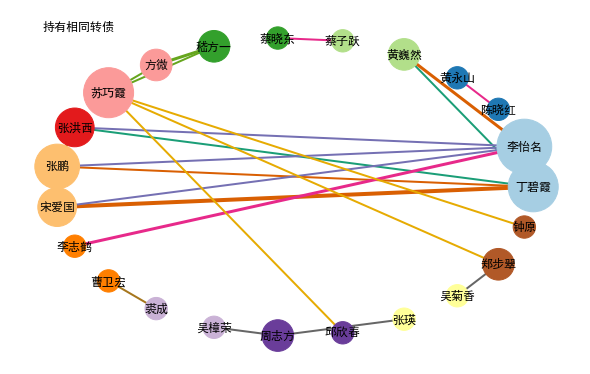

In [100]:
# namelist_ = list(set(namelist)) 
show_figure(remain_dict,name_list,'持有相同转债')

In [98]:
kv_result=[]
id=0
for k,v in remain_dict.items():
    d={}
    d['Source']=k[0]
    d['Target']=k[1]
    d['Weight']=v
    kv_result.append(d)
    id+=1
df = pd.DataFrame(kv_result)
df.to_csv('mycsv4.csv',encoding='gbk',index_label=None,index=None)

In [64]:
remain_dict

{('丁碧霞', '李志鹤'): 4,
 ('丁碧霞', '李怡名'): 17,
 ('李志鹤', '李怡名'): 5,
 ('梁小红', '郑志坤'): 3,
 ('梁小红', '翟建琴'): 3,
 ('丁碧霞', '张鹏'): 3,
 ('张鹏', '李怡名'): 3,
 ('蔡子跃', '蔡晓东'): 3,
 ('曹卫宏', '裘成'): 3}

In [65]:
df.head()

,Source,Target,Weight
0,丁碧霞,李志鹤,4
1,丁碧霞,李怡名,17
2,李志鹤,李怡名,5
3,梁小红,郑志坤,3
4,梁小红,翟建琴,3


In [ ]:
individual = mask_df['name'].value_counts()
for i in individual.index:
    print(f'{i:3}{individual.loc[i]:4}')

In [87]:
individual[individual>2].plot()

AttributeError: 'Series' object has no attribute 'bar'

In [88]:
import joblib
joblib.dump(individual,'individual.jb')

['individual.jb']

In [31]:
from pyecharts import options as opts
from pyecharts.charts import Bar
import datetime
# 翻转Y轴

# data=individual[individual>2]
# data=data.sort_values(ascending=False)
# X=data.index.tolist()
# Y=data.values.tolist()
# print(X)
# print(Y)
X=[]
Y=[]
for i in result.keys():
    if result[i]>=3:
        X.append(i)
        Y.append(result[i])

c = (
    Bar()
    .add_xaxis(X)
    .add_yaxis(
        "持有转债数目大于等于3个", 
    Y,
    # linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 0, 0)')
    )
    # .reversal_axis()
    # .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="可转债牛散分布"),
    xaxis_opts=opts.AxisOpts(
                                name='名称',
                                min_interval=1,
                                splitline_opts=opts.SplitLineOpts(is_show=True),
                                axislabel_opts=opts.LabelOpts(rotate=45),

                                ),
                                yaxis_opts=opts.AxisOpts(
                                name='个数',
                                # min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),).set_colors(['green'])
    
).render('十大持有人{}.html'.format(datetime.date.today()))

In [ ]:
df[df['name'].str.contains('明汯')]

In [16]:
df.to_excel('十大持有人2022-04-01.xlsx',encoding='utf8')

In [115]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [121]:
df[df['name']=='丁碧霞']['amount_float'].sum()

4306100.0

In [120]:
df[df['name']=='李怡名']['amount']

190     37.44万
213     21.15万
262     16.55万
330     18.63万
395      7.26万
580     28.18万
860     19.01万
911      7.70万
932     11.00万
1078     6.39万
1171    38.14万
1512    25.36万
1550     9.87万
1668    32.75万
1681     9.28万
1709    12.54万
1899     7.67万
1912     3.59万
2065    12.65万
2111    35.76万
2141    46.70万
2402    28.51万
2485     7.93万
3003    67.97万
3508     8.38万
Name: amount, dtype: object

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  24 non-null     object
 1   Target  24 non-null     object
 2   Weight  24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [104]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 210 to 22756
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SECUCODE        852 non-null    object 
 1   SECURITY_CODE   852 non-null    object 
 2   BOND_NAME_ABBR  852 non-null    object 
 3   HOLDER_NAME     852 non-null    object 
 4   END_DATE        852 non-null    object 
 5   HOLD_NUM        852 non-null    int64  
 6   HOLD_RATIO      852 non-null    float64
 7   HOLDER_RANK     852 non-null    int64  
 8   invest_company  852 non-null    object 
 9   person          852 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 67.4+ KB


In [112]:
columns='SECUCODE'
first_name='李怡名'
second_name='丁碧霞'
for code,row_df in person_df.groupby(columns):
    if len(row_df[row_df['invest_company'].isin([first_name])])>0 and len(row_df[row_df['invest_company'].isin([second_name])])>0:
        print(row_df['BOND_NAME_ABBR'].iloc[0],'\t',round(row_df[row_df['invest_company']==first_name]['HOLD_RATIO'].iloc[0],0),'\t',round(row_df[row_df['invest_company']==second_name]['HOLD_RATIO'].iloc[0],0))


奇精转债 	 14.0 	 5.0
迪贝转债 	 11.0 	 7.0
沪工转债 	 2.0 	 11.0
淳中转债 	 6.0 	 12.0
新星转债 	 13.0 	 7.0
晨丰转债 	 10.0 	 7.0
银信转债 	 11.0 	 4.0
三超转债 	 3.0 	 8.0
斯莱转债 	 14.0 	 2.0
明电转债 	 2.0 	 8.0
正丹转债 	 1.0 	 3.0
瑞丰转债 	 3.0 	 6.0
申昊转债 	 2.0 	 3.0
迪龙转债 	 7.0 	 2.0


In [73]:
df['HOLDER_NAME'].value_counts().to_excel('holding_list.xlsx',encoding='utf8')

In [67]:
df['invest_company']=df['HOLDER_NAME'].map(get_invest_company)

In [68]:
df.head()

,SECUCODE,SECURITY_CODE,BOND_NAME_ABBR,HOLDER_NAME,END_DATE,HOLD_NUM,HOLD_RATIO,HOLDER_RANK,invest_company
0,113502.SH,113502,嘉澳转债,华夏基金延年益寿5号纯债固定收益型养老金产品-中国农业银行股份有限公司,2022-06-30,92410,5.02,1,华夏基金延年益寿5号纯债固定收益型养老金产品
1,113502.SH,113502,嘉澳转债,中融国际信托有限公司-中融-墨砺29号证券投资集合资金信托计划,2022-06-30,81300,4.41,2,中融国际信托有限公司
2,113502.SH,113502,嘉澳转债,平安银行股份有限公司-长信可转债债券型证券投资基金,2022-06-30,80940,4.39,3,平安银行股份有限公司
3,113502.SH,113502,嘉澳转债,华夏基金延年益寿7号固定收益型养老金产品-中信银行股份有限公司,2022-06-30,80530,4.37,4,华夏基金延年益寿7号固定收益型养老金产品
4,113502.SH,113502,嘉澳转债,中国工商银行股份有限公司-银华可转债债券型证券投资基金,2022-06-30,75710,4.11,5,中国工商银行股份有限公司


In [78]:
df['invest_company'].value_counts().to_excel('invests.xlsx',encoding='utf8')

In [ ]:
for index,row in df[df['invest_company']=='华夏基金延年益寿5号纯债固定收益型养老金产品'].iterrows():
    print(row['HOLDER_NAME'])

In [69]:
def private_person(x):
    if len(x)<4:
        return True
    else:
        return False

df['person']=df['invest_company'].map(private_person)

In [70]:
person_df = df[df['person']]

In [71]:
person_df.head()

,SECUCODE,SECURITY_CODE,BOND_NAME_ABBR,HOLDER_NAME,END_DATE,HOLD_NUM,HOLD_RATIO,HOLDER_RANK,invest_company,person
210,113635.SH,113635,升21转债,徐旭东,2022-06-30,2200860,16.30,2,徐旭东,True
242,123097.SZ,123097,美力转债,丁碧霞,2022-06-30,196326,6.55,1,丁碧霞,True
244,123097.SZ,123097,美力转债,张涛,2022-06-30,89840,3.00,3,张涛,True
249,123097.SZ,123097,美力转债,莫浩礼,2022-06-30,42320,1.41,8,莫浩礼,True
251,123097.SZ,123097,美力转债,章碧鸿,2022-06-30,40409,1.35,10,章碧鸿,True


In [72]:
result = person_df['invest_company'].value_counts().to_dict()

In [137]:
len(df)

4312

In [136]:
df[df['HOLDER_NAME'].str.contains('')].sort_values('HOLDER_RANK',ascending=True)[['SECURITY_CODE','BOND_NAME_ABBR','HOLDER_NAME','HOLD_NUM','HOLD_RATIO','HOLDER_RANK']]

,SECURITY_CODE,BOND_NAME_ABBR,HOLDER_NAME,HOLD_NUM,HOLD_RATIO,HOLDER_RANK


In [123]:
result.groupby('BOND_NAME_ABBR').sum().sort_values('HOLD_RATIO',ascending=False)

,HOLD_NUM,HOLD_RATIO,HOLDER_RANK
BOND_NAME_ABBR,,,
纵横转债,350690,13.00,25
华体转债,262600,12.58,34
宝莱转债,211633,9.66,28
瀛通转债,275366,9.18,36
德尔转债,227008,9.05,36
翔港转债,140010,8.68,30
今飞转债,60700,3.52,18
全筑转债,81760,2.13,14
威唐转债,61836,2.05,7


In [125]:
df.head()

,SECUCODE,SECURITY_CODE,BOND_NAME_ABBR,HOLDER_NAME,END_DATE,HOLD_NUM,HOLD_RATIO,HOLDER_RANK
0,113502.SH,113502,嘉澳转债,华夏基金延年益寿5号纯债固定收益型养老金产品-中国农业银行股份有限公司,2022-06-30,92410,5.02,1
1,113502.SH,113502,嘉澳转债,中融国际信托有限公司-中融-墨砺29号证券投资集合资金信托计划,2022-06-30,81300,4.41,2
2,113502.SH,113502,嘉澳转债,平安银行股份有限公司-长信可转债债券型证券投资基金,2022-06-30,80940,4.39,3
3,113502.SH,113502,嘉澳转债,华夏基金延年益寿7号固定收益型养老金产品-中信银行股份有限公司,2022-06-30,80530,4.37,4
4,113502.SH,113502,嘉澳转债,中国工商银行股份有限公司-银华可转债债券型证券投资基金,2022-06-30,75710,4.11,5


In [126]:
df.to_excel('2022-06-30年报十大持有人.xlsx',encoding='utf8')

In [131]:
df.groupby('BOND_NAME_ABBR').sum().sort_values('person',ascending=False).head(50)

,HOLD_NUM,HOLD_RATIO,HOLDER_RANK,person
BOND_NAME_ABBR,,,,
天康转债,488650,57.58,55,10
蓝盾转债,84320,8.42,55,10
三超转债,471767,24.22,55,10
丰山转债,2810570,56.21,55,10
尚荣转债,161550,8.49,46,9
联得转债,215890,14.67,50,9
天铁转债,76885,13.12,54,9
永吉转债,53120,3.64,54,9
佳力转债,236910,7.95,51,9
